<a href="https://colab.research.google.com/github/ilhamjamaluddin/Mangrove_AGERS2024/blob/main/AGERS2024_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AGERS 2024 - Geosoftware.ID
## Artificial Intelligence for mangrove mapping and monitoring using Remote Sensing Imagery and Extreme Gradient Boosting (XGBoost) Algorithm with Python

### **This notebook will cover:**
1. Raster processing using rasterio
2. Training sample preparation
3. XGboost training process and hyperparameter finetuning for mangrove classification
4. Evaluation assessments
5. Mangrove mapping in 2019
6. Mangrove mapping in 2024
7. Mangrove monitoring analysis


**Note:** The Pre-processing of Sentinel-2 as the input data can be seen in the Google Earth Engine (GEE): https://code.earthengine.google.com/898b0d1b8a17f994f426e6ec800799ba

**You need to create Mangrove_AGERS2024 folder in your Google Drive**



## Raster Processing
In this step we will learn how to:
1. Import Sentinel-2 Data (.tif) in Google Colab using Rasterio Library
2. Analysis the information of raster data
3. Visualize the Sentinel-2 image for 2019 and 2024

**Note:** Makesure you already have Mangrove_AGERS2024 folder in your Google Drive that contains Sentinel2_2024.tif and Sentinel2_2019.tif

### Import Sentinel-2 Data and Show the Raster Information

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# install Library rasterio
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 47.3 MB/s eta 0:00:00


In [ ]:
# Import Libraries
import rasterio
import numpy as np
import matplotlib.pyplot as plt

#### For 2019

In [ ]:
# Read raster file .tif using rasterio
# Adjust the raster file path for 2019 according to your Google Drive
raster_file_path_2019 = '/content/drive/MyDrive/Mangrove_AGERS2024/Sentinel2_2019.tif'
S2_dataset_2019 = rasterio.open(raster_file_path_2019)

In [ ]:
# Open all bands in our raster data
S2_image_all_2019 = S2_dataset_2019.read()
S2_image_all_2019.shape

(9, 530, 262)

In [ ]:
# We can see, the shape format of our raster data is bands, row, column
# To further process using numpy and matplotlib, the suitable shape format is row, column,bands
# So we need to firstly change the shape format become row, column,bands:
S2_image_all_2019 = S2_image_all_2019.transpose(1, 2, 0)
S2_image_all_2019.shape

(530, 262, 9)

In [ ]:
## ------ Raster Information ------ ##

# Create function: This function retrieves and prints information about a raster dataset.
def get_raster_info(dataset):
  # Image name
  img_name = dataset.name
  print('Image filename: {n}\n'.format(n=img_name))

  # How many bands in the image
  num_bands = dataset.count
  print('Total Bands: {n}\n'.format(n=num_bands))

  # Band List
  desc = dataset.descriptions
  print('Raster description band list: {desc}\n'.format(desc=desc))

  # Image size (column and row)
  rows, cols = dataset.shape
  print('Image size: {r} rows x {c} columns\n'.format(r=rows, c=cols))

  # Format driver data
  driver = dataset.driver
  print('Raster driver: {d}\n'.format(d=driver))

  # Raster data projection
  proj = dataset.crs
  print('Image projection:')
  print(proj, '\n')

  # Check all metadata
  metadata = dataset.meta
  print('All metadata:')
  print(metadata)

# Use the created get_raster_info function
get_raster_info(S2_dataset_2019)

Image filename: /content/drive/MyDrive/Mangrove_AGERS2024/Sentinel2_2019.tif

Total Bands: 9

Raster description band list: ('B2', 'B3', 'B4', 'B8', 'B11', 'B12', 'ndvi', 'ndmi', 'cmri')

Image size: 530 rows x 262 columns

Raster driver: GTiff

Image projection:
EPSG:4326 

All metadata:
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 262, 'height': 530, 'count': 9, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(8.983152841195215e-05, 0.0, 105.87364275575857,
       0.0, -8.983152841195215e-05, -4.564519621668112)}


#### For 2024

In [ ]:
# Read raster file .tif using rasterio
# Adjust the raster file path for 2024 according to your Google Drive
raster_file_path_2024 = '/content/drive/MyDrive/Mangrove_AGERS2024/Sentinel2_2024.tif'
S2_dataset_2024 = rasterio.open(raster_file_path_2024)

In [ ]:
# Open all bands in our raster data
S2_image_all_2024 = S2_dataset_2024.read()
S2_image_all_2024.shape

# Reshape data
S2_image_all_2024 = S2_image_all_2024.transpose(1, 2, 0)
S2_image_all_2024.shape

(530, 262, 9)

In [ ]:
## ------ Raster Information ------ ##
get_raster_info(S2_dataset_2024)

Image filename: /content/drive/MyDrive/Mangrove_AGERS2024/Sentinel2_2024.tif

Total Bands: 9

Raster description band list: ('B2', 'B3', 'B4', 'B8', 'B11', 'B12', 'ndvi', 'ndmi', 'cmri')

Image size: 530 rows x 262 columns

Raster driver: GTiff

Image projection:
EPSG:4326 

All metadata:
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 262, 'height': 530, 'count': 9, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(8.983152841195215e-05, 0.0, 105.87364275575857,
       0.0, -8.983152841195215e-05, -4.564519621668112)}


### Visualization of Sentinel-2 Image in 2019 and 2024

We will visualize the Sentinel-2 using matplotlib

In [ ]:
# Import AOI to get the geographical extent
import geopandas as gpd

AOI = gpd.read_file('/content/drive/MyDrive/Mangrove_AGERS2024/AOI_AGERS2024.shp')

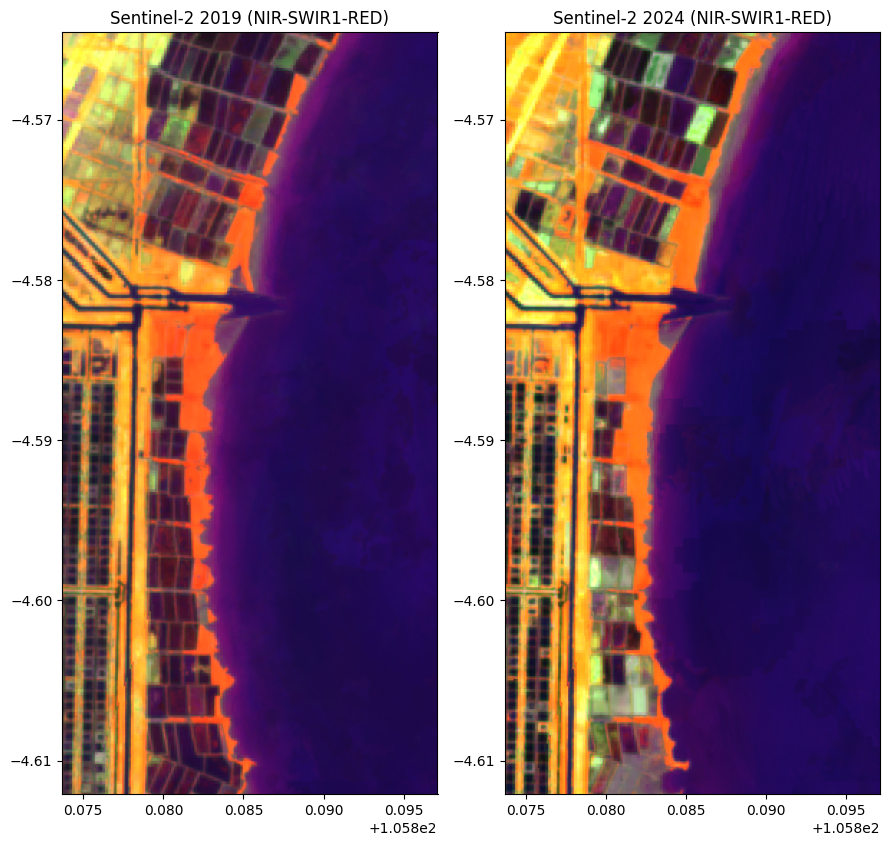

In [ ]:
# Create figure for two subplot: 1 for Sentinel-2 2019 and 2. for Sentinel-2 2024
fig, ax = plt.subplots(1, 2, figsize=(9, 18))

# Display Original Sentinel-2 image in 2019 False color composite (NIR-SWIR1-RED)
S2_Vis_2019 = np.stack([S2_dataset_2019.read(4), S2_dataset_2019.read(5), S2_dataset_2019.read(3)], axis=-1)
brightness_factor = 3.5
S2_Vis_2019 = np.clip(S2_Vis_2019 * brightness_factor, 0, 1)

ax[0].imshow(S2_Vis_2019, extent=[AOI.total_bounds[0], AOI.total_bounds[2],AOI.total_bounds[1], AOI.total_bounds[3]])
ax[0].set_title('Sentinel-2 2019 (NIR-SWIR1-RED)')

# Display Original Sentinel-2 image in 2024 False color composite (NIR-SWIR1-RED)
S2_Vis_2024 = np.stack([S2_dataset_2024.read(4), S2_dataset_2024.read(5), S2_dataset_2024.read(3)], axis=-1)
S2_Vis_2024 = np.clip(S2_Vis_2024 * brightness_factor, 0, 1)

ax[1].imshow(S2_Vis_2024, extent=[AOI.total_bounds[0], AOI.total_bounds[2],AOI.total_bounds[1], AOI.total_bounds[3]])
ax[1].set_title('Sentinel-2 2024 (NIR-SWIR1-RED)')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Mangrove_AGERS2024/Result/Sentinel-2_Visualization.jpeg', dpi=600)
plt.show()


## Sample Data Preparation

* After we got the sample points from GEE (300 non-mangrove and 300 mangrove)
* Next steps is to process the saved shapefile point samples according to our raster data.
* Here we will use Sentinel-2 image in 2019, becuase our point samples is based on visual interpretation in 2019.
* We will create the function to extract the raster pixel value for each band according to the point sample location.


**Note:** Make sure you already have the sample point data from GEE in your Google Drive: sample_class_2019.shp

In [ ]:
# Import point sample data
point_sample = gpd.read_file('/content/drive/MyDrive/Mangrove_AGERS2024/sample_class_2019.shp')
point_sample

,id,geometry
0,0,POINT (105.89528 -4.56647)
1,0,POINT (105.8933 -4.56694)
2,0,POINT (105.89296 -4.5651)
3,0,POINT (105.8915 -4.56536)
4,0,POINT (105.89047 -4.5669)
...,...,...
595,1,POINT (105.88056 -4.58739)
596,1,POINT (105.88129 -4.58901)
597,1,POINT (105.88564 -4.57605)
598,1,POINT (105.88546 -4.57633)


In [ ]:
# First check the CRS of point sample and Sentinel-2 image
# If the CRS not the same, we firstly match the CRS
if point_sample.crs != S2_dataset_2019.crs:
    print("CRS is different, match the CRS...")
    point_sample = point_sample.to_crs(S2_dataset_2019.crs)
    print("CRS point sample has been matched:", point_sample.crs)
else:
    print("CRS point sample and raster already same.")

CRS point sample and raster already same.


In [ ]:
# Create funtion to extract the raster pixel value
from rasterio.mask import mask

def extract_pixels_from_shapefile(shapefile, raster):
    training_samples = []
    for index, row in shapefile.iterrows():
        geometry = [row['geometry']]
        id_class = row['id']

        # Mask raster to get the pixel value within geomtery
        out_image, out_transform = mask(raster, geometry, crop= True, all_touched= True,filled=True, nodata=np.nan)

        # out_image shape: (bands, height, width) -- Reshape become (pixels, bands)
        out_image = out_image.reshape(raster.count, -1).T  # Now (pixels, bands)

        # Exclude the NaN pixels (If any)
        valid_pixels = out_image[~np.isnan(out_image).any(axis=1)]

        # Add the valid pixel as the features with the class id
        for pixel in valid_pixels:
            training_samples.append((pixel, id_class))

    # Converts the tuple list into numpy array
    features = np.array([sample[0] for sample in training_samples])  # Extract pixel values (features)
    labels = np.array([sample[1] for sample in training_samples])    # Extract class labels
    return features, labels

In [ ]:
# Using funtion extract pixel values to generate the input feature and the corresponding labels:
features, labels = extract_pixels_from_shapefile(point_sample, S2_dataset_2019)

# Cek shape dari features dan labels
print(features.shape)
print(labels.shape)

(600, 9)
(600,)


In [ ]:
import pandas as pd

sample_new = pd.DataFrame({'class': labels})
print(sample_new['class'].value_counts())

class
0    300
1    300
Name: count, dtype: int64


#### Split samples become training and testing

In [ ]:
from sklearn.model_selection import train_test_split

# X_train is features for training
# X_test is features for testing
# y_train is target or label for training
# y_test is traget or label for testing

# Split data: 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, stratify=labels, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(420, 9) (180, 9) (420,) (180,)


In [ ]:
# Save numpy X_train, X_test, y_train, and y_test
np.save('/content/drive/MyDrive/Mangrove_AGERS2024/Result/X_train.npy', X_train)
np.save('/content/drive/MyDrive/Mangrove_AGERS2024/Result/X_test.npy', X_test)
np.save('/content/drive/MyDrive/Mangrove_AGERS2024/Result/y_train.npy', y_train)
np.save('/content/drive/MyDrive/Mangrove_AGERS2024/Result/y_test.npy', y_test)

## XGBoost Training Process:

1. After we have the training and testing dataset, we will use the training data to train XGBoost Model
2. We will perform the hyperparameter tuning to get the best hyperparameter of XGBoost model in this dataset

In [ ]:
# Import XGBoost classifier from library xgboost
from xgboost import XGBClassifier

# create initial XGBoost model
init_xgb_model = XGBClassifier(random_state=42)

In [ ]:
# We will use GridSearch CV for hyperparameter tuning
# This fine tuning is based on cross validation.
# Cross Validation takes some of the training data randomly which
# will later be used for validation to calculate the accuracy/performance of the model during training.

from sklearn.model_selection import GridSearchCV

# Define the list of some parameters that will be used for hyperparameter tuning
# You can get the detail in:
# https://xgboost.readthedocs.io/en/latest/parameter.html

param_grid = {
    'n_estimators': [50, 100, 300],
    'max_depth': [3, 6, 9],
    'eta': [0.1, 0.3, 0.5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

In [ ]:
# GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(init_xgb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=5)

In [ ]:
# Start the training Process and hyperparamter tuning
import time

# Start the timer
start_time = time.time()

# Train XGBoost model with grid_search
grid_search.fit(X_train, y_train)

# End the timer
end_time = time.time()

# Calculate and print the time taken
elapsed_time = end_time - start_time
print(f"time needed is: {elapsed_time:.3f} seconds")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
time needed is: 56.219 seconds


In [ ]:
# Print the best parameters
print("Best parameters is:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best parameters is: {'colsample_bytree': 0.8, 'eta': 0.1, 'gamma': 0, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Best cross-validation accuracy: 0.9904761904761905


## Evaluation Assessments using Testing Data

In [ ]:
# Create evaluation  assessment function
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_classification(y_true, y_pred):
    # Calculate overall accuracy
    OA = accuracy_score(y_true, y_pred)

    # Print Overall Accuracy
    print(f"Overall Accuracy: {OA:.4f}")

    # Calculate the classification report: precision, recall, f1-score
    report = classification_report(y_true, y_pred, digits=4)
    print(report)

    # Calculate confusion matrix
    class_names = ['Non-Mangrove', 'Mangrove']
    cm = confusion_matrix(y_true, y_pred)

    # Visualisasi confusion matrix using seaborn heatmap
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix', fontsize=14)
    plt.show()

Overall Accuracy: 1.0000
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        90
           1     1.0000    1.0000    1.0000        90

    accuracy                         1.0000       180
   macro avg     1.0000    1.0000    1.0000       180
weighted avg     1.0000    1.0000    1.0000       180



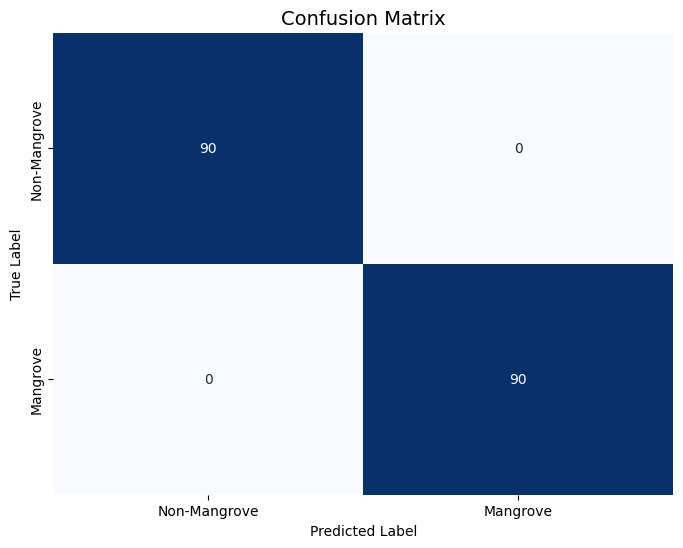

In [ ]:
# Evaluation assessment using testing dataset

# Apply best parameter xgb
best_xgb = grid_search.best_estimator_

# Apply xgb_model_best to predict the mangrove classification using testing data
y_pred_grid = best_xgb.predict(X_test)

# using the evaluate_classification function
evaluate_classification(y_test, y_pred_grid)

<Figure size 1000x800 with 0 Axes>

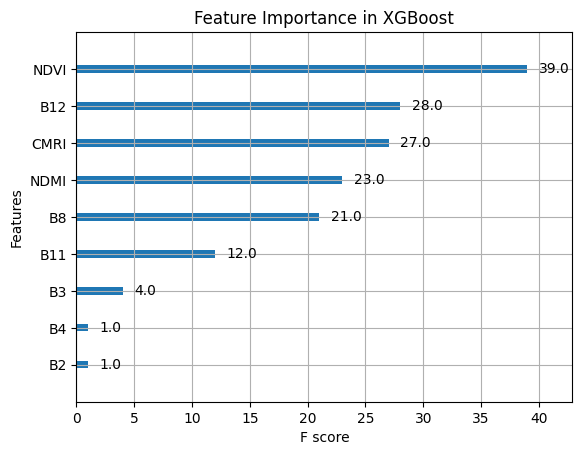

In [ ]:
# Shows the fetaure importance

from xgboost import plot_importance
import matplotlib.pyplot as plt

# Band list
band_descriptions = ['B2', 'B3', 'B4', 'B8', 'B11', 'B12',
                     'NDVI', 'NDMI', 'CMRI']

# Set band list as feature names
best_xgb.get_booster().feature_names = band_descriptions

# Plot feature important,
# https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.plot_importance
plt.figure(figsize=(10, 8))
plot_importance(best_xgb, importance_type='weight') # you can change the importace type
plt.title("Feature Importance in XGBoost")
plt.show()


In [ ]:
# Save the trained model

import joblib

# Save the model
joblib.dump(best_xgb, '/content/drive/MyDrive/Mangrove_AGERS2024/Result/best_xgb_landcover_model.pkl')

['/content/drive/MyDrive/Mangrove_AGERS2024/Result/best_xgb_landcover_model.pkl']

## Create Mangrove Map in 2019

In [ ]:
# Create Function to apply XGBoost model to classify the whole study area
def classify_raster(raster, model):
    raster_data = raster.read().reshape((raster.count, -1)).T  # Reshape to (pixels, bands)
    mask = np.isnan(raster_data).any(axis=1)  # Exclude NaN pixels
    classified = np.full(raster_data.shape[0], np.nan)
    classified[~mask] = model.predict(raster_data[~mask])
    return classified.reshape((raster.height, raster.width))

# Apply function classify_raster
classified_map_2019 = classify_raster(S2_dataset_2019, best_xgb)

In [ ]:
classified_map_2019.shape

(530, 262)

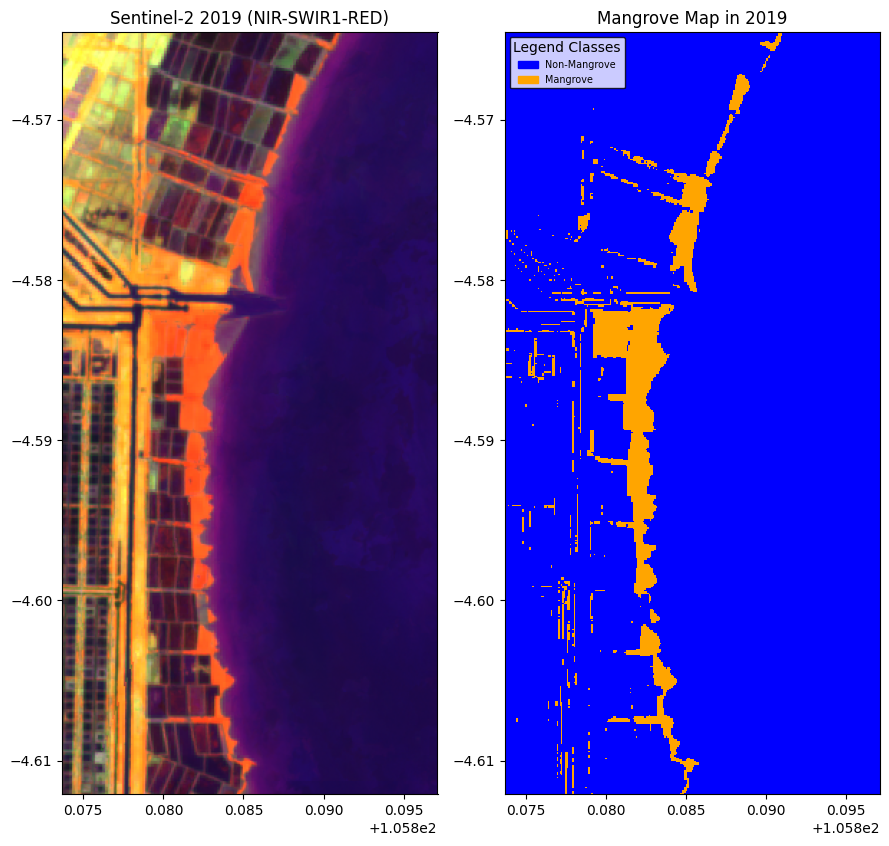

In [ ]:
# Visualize the classified map in 2019

import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap

# Mendefinisikan Legend dan warna untuk setiap kelas
legend_labels = ['Non-Mangrove', 'Mangrove']
legend_colors = ['blue', 'orange']

# Membuat figure untuk dua subplot: 1 untuk Sentinel-2 dan 2. untuk  hasil klasifikasi penutup lahan
fig, ax = plt.subplots(1, 2, figsize=(9, 11))

# Display Original Sentinel-2 image in 2019 False color composite (NIR-SWIR1-RED)
S2_Vis_2019 = np.stack([S2_dataset_2019.read(4), S2_dataset_2019.read(5), S2_dataset_2019.read(3)], axis=-1)
brightness_factor = 3.5
S2_Vis_2019 = np.clip(S2_Vis_2019 * brightness_factor, 0, 1)

ax[0].imshow(S2_Vis_2019, extent=[AOI.total_bounds[0], AOI.total_bounds[2],AOI.total_bounds[1], AOI.total_bounds[3]])
ax[0].set_title('Sentinel-2 2019 (NIR-SWIR1-RED)')

# Visualize the classifed map
# Define colormap
cmap = ListedColormap(legend_colors)

# Display Classifed Map
im = ax[1].imshow(classified_map_2019, cmap=cmap, interpolation='nearest', extent=[AOI.total_bounds[0], AOI.total_bounds[2],AOI.total_bounds[1], AOI.total_bounds[3]])
ax[1].set_title('Mangrove Map in 2019')

# Create legend
legend_handles = [mpatches.Patch(color=legend_colors[i], label=legend_labels[i]) for i in range(len(legend_labels))]
# Add legend into the plot
ax[1].legend(handles=legend_handles, loc='upper left', title="Legend Classes", fontsize='x-small', title_fontsize='medium', edgecolor="black", fancybox=True)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Mangrove_AGERS2024/Result/Classified Map Using XGboost in 2019.jpeg', dpi=600)
plt.show()


In [ ]:
# Export the classified map to tif

import rasterio
from rasterio.transform import from_origin

def export_classified_map(classified_map, reference_raster, output_path):
    # Get meta data from Sentinel-2
    meta = reference_raster.meta.copy()

    # Update the metadata
    meta.update({
        "driver": "GTiff",
        "dtype": 'int32',  # for class integer
        "count": 1,        # Just One band
        "compress": "lzw"  # file compression
    })

    with rasterio.open(output_path, 'w', **meta) as dst:
        dst.write(classified_map.astype('int32'), 1)

# Apply the export function
output_tif_path = '/content/drive/MyDrive/Mangrove_AGERS2024/Result/Classified_Map_2019.tif'
export_classified_map(classified_map_2019, S2_dataset_2019, output_tif_path)

## Create Mangrove Map in 2024

In [ ]:
# Apply function classify_raster for 2024
classified_map_2024 = classify_raster(S2_dataset_2024, best_xgb)
classified_map_2024.shape

(530, 262)

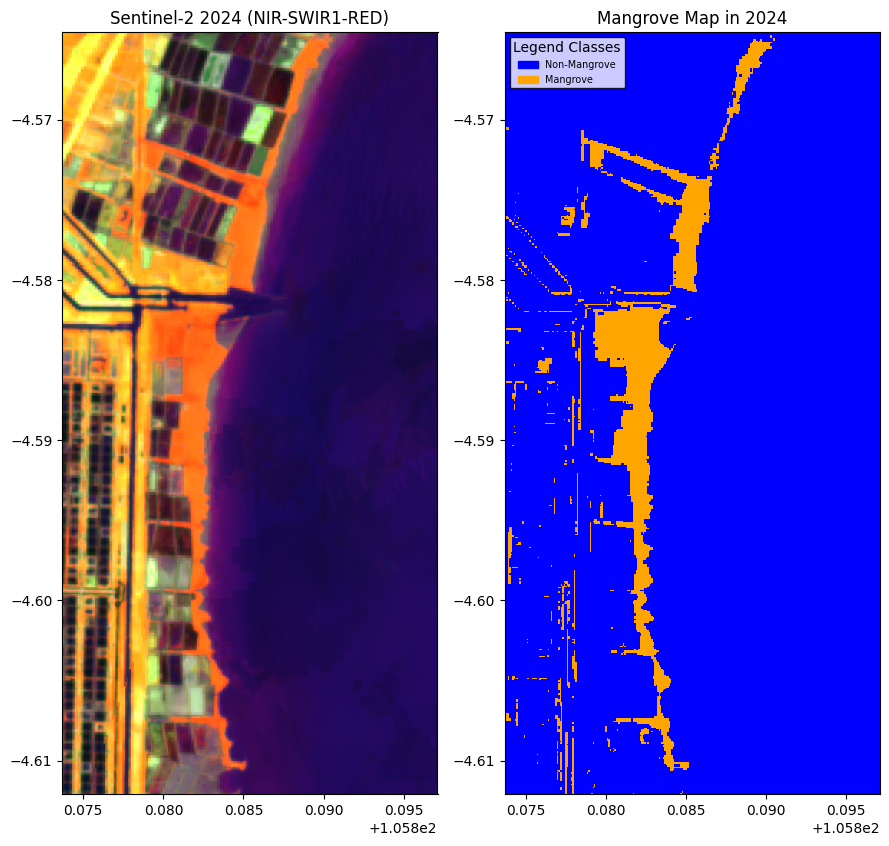

In [ ]:
# Visualize the classified map in 2024

import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap

# Mendefinisikan Legend dan warna untuk setiap kelas
legend_labels = ['Non-Mangrove', 'Mangrove']
legend_colors = ['blue', 'orange']

# Membuat figure untuk dua subplot: 1 untuk Sentinel-2 dan 2. untuk  hasil klasifikasi penutup lahan
fig, ax = plt.subplots(1, 2, figsize=(9, 11))

# Display Original Sentinel-2 image in 2024 False color composite (NIR-SWIR1-RED)
S2_Vis_2024 = np.stack([S2_dataset_2024.read(4), S2_dataset_2024.read(5), S2_dataset_2024.read(3)], axis=-1)
brightness_factor = 3.5
S2_Vis_2024 = np.clip(S2_Vis_2024 * brightness_factor, 0, 1)

ax[0].imshow(S2_Vis_2024, extent=[AOI.total_bounds[0], AOI.total_bounds[2],AOI.total_bounds[1], AOI.total_bounds[3]])
ax[0].set_title('Sentinel-2 2024 (NIR-SWIR1-RED)')

# Visualize the classifed map
# Define colormap
cmap = ListedColormap(legend_colors)

# Display Classifed Map
im = ax[1].imshow(classified_map_2024, cmap=cmap, interpolation='nearest', extent=[AOI.total_bounds[0], AOI.total_bounds[2],AOI.total_bounds[1], AOI.total_bounds[3]])
ax[1].set_title('Mangrove Map in 2024')

# Create legend
legend_handles = [mpatches.Patch(color=legend_colors[i], label=legend_labels[i]) for i in range(len(legend_labels))]
# Add legend into the plot
ax[1].legend(handles=legend_handles, loc='upper left', title="Legend Classes", fontsize='x-small', title_fontsize='medium', edgecolor="black", fancybox=True)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Mangrove_AGERS2024/Result/Classified Map Using XGboost in 2024.jpeg', dpi=600)
plt.show()


In [ ]:
# Export tif file:

output_tif_path = '/content/drive/MyDrive/Mangrove_AGERS2024/Result/Classified_Map_2024.tif'
export_classified_map(classified_map_2024, S2_dataset_2024, output_tif_path)

## Change Analysis

### Calculate the mangrove area

In [ ]:
# Mendefiniskan kelas penutup lahan
labels = ['Non-Mangrove', 'Mangrove']
classes = [0, 1]

# Sentinel-2 pixel size in hectares (each pixel covers 10m x 10m or 100 m² = 0.01 hectares)
pixel_area_ha = 0.01

# Membuat function untuk menghitung luasan per kelas dan total area
def calculate_class_areas(classified_map, classes, pixel_area_ha):
    areas = {}
    for cls in classes:
        # Menghitung total piksel untuk setiap kelas
        pixel_count = np.sum(classified_map == cls)
        # Convert menjadi area Ha
        area = pixel_count * pixel_area_ha
        areas[cls] = area
    return areas

# Menerapkan fungsi yang telah dibuat
area_by_class_2019 = calculate_class_areas(classified_map_2019, classes, pixel_area_ha)
area_by_class_2024 = calculate_class_areas(classified_map_2024, classes, pixel_area_ha)

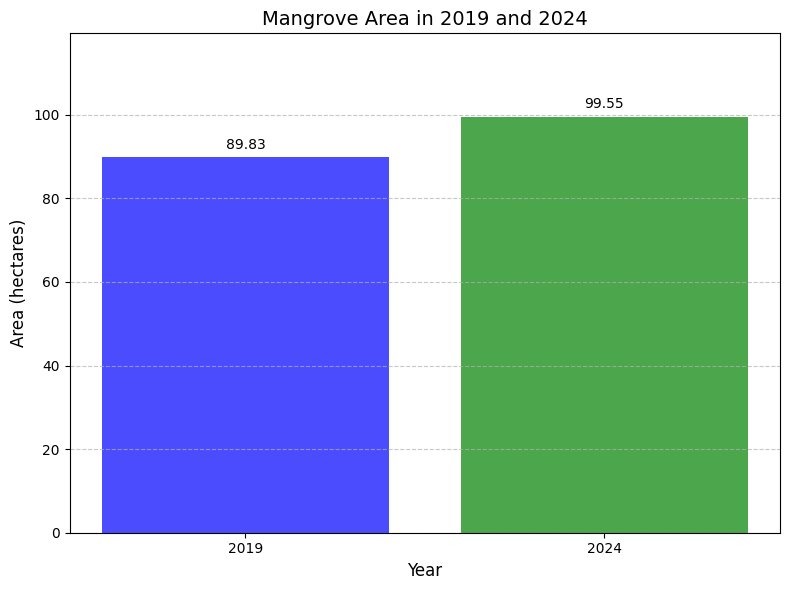

In [ ]:
# Extract mangrove area (class 1) from the dictionaries
mangrove_area_2019 = area_by_class_2019[1]
mangrove_area_2024 = area_by_class_2024[1]

# Prepare data for the bar chart
years = ['2019', '2024']
areas = [mangrove_area_2019, mangrove_area_2024]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(years, areas, color=['blue', 'green'], alpha=0.7)
plt.title("Mangrove Area in 2019 and 2024", fontsize=14)
plt.ylabel("Area (hectares)", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(areas) * 1.2)

# Annotate the bars with the area values
for i, area in enumerate(areas):
    plt.text(i, area + max(areas) * 0.02, f"{area:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Mangrove_AGERS2024/Result/Mangrove_Area_BarChart.jpeg', dpi=600)
plt.show()

## Calculate the change map

Mangrove Intact in Ha (1 -> 1): 68.88
Mangrove Loss in Ha (1 -> 0): 20.95
Mangrove Gain in Ha (0 -> 1): 30.67
Non-Mangrove in Ha (0 -> 0): 1268.1000000000001


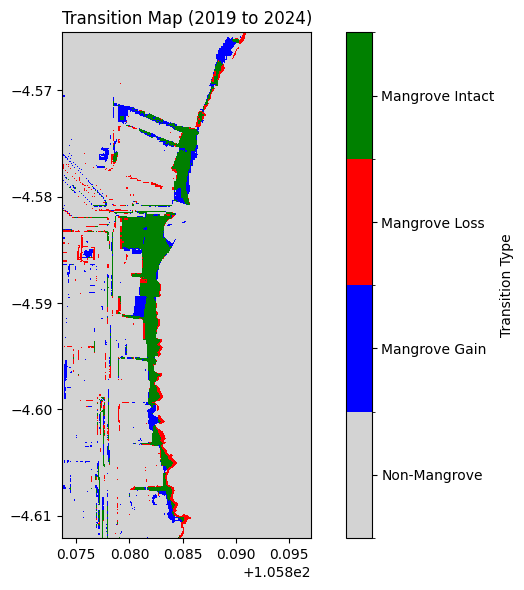

In [ ]:
# Create a transition map
transition_map = (classified_map_2019 * 2) + classified_map_2024

# Define transition labels
# 3: Mangrove intact
# 2: Mangrove loss
# 1: Mangrove gain
# 0: Non-Mangrove
mangrove_intact = np.sum(transition_map == 3)
mangrove_loss = np.sum(transition_map == 2)
mangrove_gain = np.sum(transition_map == 1)
non_mangrove = np.sum(transition_map == 0)

# Print the counts for each transition type
print("Mangrove Intact in Ha (1 -> 1):", mangrove_intact*0.01)
print("Mangrove Loss in Ha (1 -> 0):", mangrove_loss*0.01)
print("Mangrove Gain in Ha (0 -> 1):", mangrove_gain*0.01)
print("Non-Mangrove in Ha (0 -> 0):", non_mangrove*0.01)

# Define a discrete colormap
colors = ["lightgray", "blue", "red", "green"]
cmap = mcolors.ListedColormap(colors)
bounds = [-0.5, 0.5, 1.5, 2.5, 3.5]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Plot the transition map
plt.figure(figsize=(8, 6))
plt.title("Transition Map (2019 to 2024)")
plt.imshow(transition_map, extent=[AOI.total_bounds[0], AOI.total_bounds[2],AOI.total_bounds[1], AOI.total_bounds[3]],cmap=cmap, norm=norm, interpolation='nearest')
cbar = plt.colorbar(ticks=[0, 1, 2, 3])
cbar.ax.set_yticklabels(['Non-Mangrove', 'Mangrove Gain', 'Mangrove Loss', 'Mangrove Intact'])
cbar.set_label("Transition Type")
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Mangrove_AGERS2024/Result/Mangrove_Transition_Map_2019-2024.jpeg', dpi=600)
plt.show()

In [ ]:
# Export to tif

# Reclassification mapping
# 0 -> Non-Mangrove
# 1 -> Mangrove Gain
# 2 -> Mangrove Loss
# 3 -> Mangrove Intact
reclassified_map = np.zeros_like(transition_map)

reclassified_map[transition_map == 0] = 0  # Non-Mangrove
reclassified_map[transition_map == 1] = 1  # Mangrove Gain
reclassified_map[transition_map == 2] = 2  # Mangrove Loss
reclassified_map[transition_map == 3] = 3  # Mangrove Intact

output_tif_path = '/content/drive/MyDrive/Mangrove_AGERS2024/Result/Mangrove_Change.tif'
export_classified_map(reclassified_map, S2_dataset_2019, output_tif_path)